# Clean & Analyze Social Media

## Introduction

Social media has become a ubiquitous part of modern life, with platforms such as Instagram, Twitter, and Facebook serving as essential communication channels. Social media data sets are vast and complex, making analysis a challenging task for businesses and researchers alike. In this project, I explore a simulated social media, for example Tweets, data set to understand trends in likes across different categories.

## Project Scope

The objective of this project is to analyze tweets (or other social media data) and gain insights into user engagement. I will explore the data set using visualization techniques to understand the distribution of likes across different categories. Finally, I will analyze the data to draw conclusions about the most popular categories and the overall engagement on the platform.

## Importing Required Libraries

In [23]:
import pandas as pd
from pandasql import sqldf
import numpy as np
import matplotlib.pyplot as plt
import random

## Creating Categories List, Data Size, and Random Datas

In [2]:
categories = ['Food', 'Travel', 'Fashion',
              'Fitness', 'Music', 'Culture',
              'Family', 'Health', 'Sports']

In [3]:
n = 1000

In [4]:
data_dict = {'Date': pd.date_range('2023-01-01', periods=n),
             'Category': [random.choice(categories) for _ in range(n)],
             'Likes': np.random.randint(0, 10000, size=n)}

## Transporting from Dictionary to DataFrame

In [5]:
df = pd.DataFrame(data_dict)
df.tail()

,Date,Category,Likes
995,2025-09-22,Food,7469
996,2025-09-23,Fashion,3457
997,2025-09-24,Family,6992
998,2025-09-25,Fashion,4705
999,2025-09-26,Travel,2088


## EDA 

In [6]:
df.dtypes

Date        datetime64[ns]
Category            object
Likes                int32
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1000 non-null   datetime64[ns]
 1   Category  1000 non-null   object        
 2   Likes     1000 non-null   int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 19.7+ KB


- Dropping the Duplicate Rows

In [8]:
df.duplicated().sum()

0

- Great! Fortunately there is none of them

In [9]:
df.drop_duplicates()

,Date,Category,Likes
0,2023-01-01,Sports,5584
1,2023-01-02,Fashion,7069
2,2023-01-03,Fitness,3918
3,2023-01-04,Culture,4662
4,2023-01-05,Travel,3891
...,...,...,...
995,2025-09-22,Food,7469
996,2025-09-23,Fashion,3457
997,2025-09-24,Family,6992
998,2025-09-25,Fashion,4705


- Dropping the Missing & Null Values

In [10]:
df.isnull().sum()

Date        0
Category    0
Likes       0
dtype: int64

- Again, no missing & null values

In [11]:
df = df.dropna()
df.count()

Date        1000
Category    1000
Likes       1000
dtype: int64

## Converting Fields

- Even though the Date and Likes columns are in the correct format, I applied these formatting steps.

In [12]:
df['Date'] = pd.to_datetime(df['Date'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1000 non-null   datetime64[ns]
 1   Category  1000 non-null   object        
 2   Likes     1000 non-null   int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 19.7+ KB


In [14]:
df['Likes'] = df['Likes'].astype('int64')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1000 non-null   datetime64[ns]
 1   Category  1000 non-null   object        
 2   Likes     1000 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 23.6+ KB


## Visualizing and Analyzing the Data

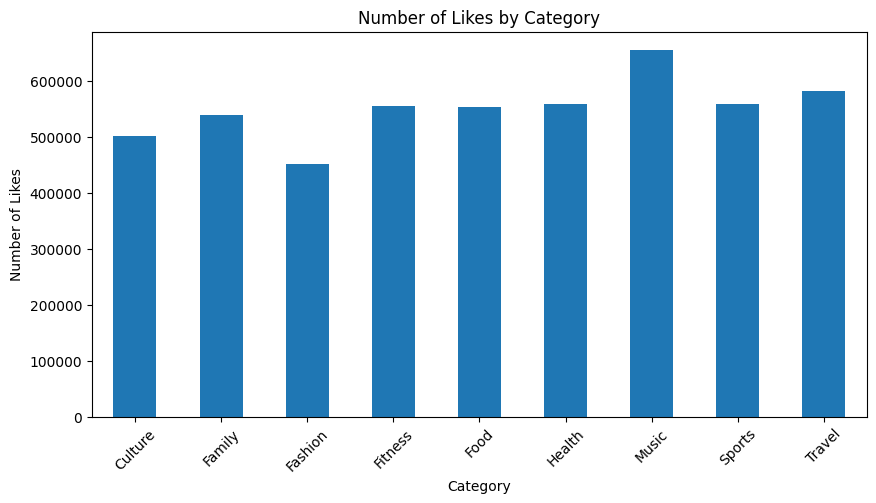

In [16]:
likes_by_category = df.groupby('Category')['Likes'].sum()
likes_by_category.plot(kind="bar", figsize=(10,5))
plt.title("Number of Likes by Category")
plt.ylabel("Number of Likes")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.show()

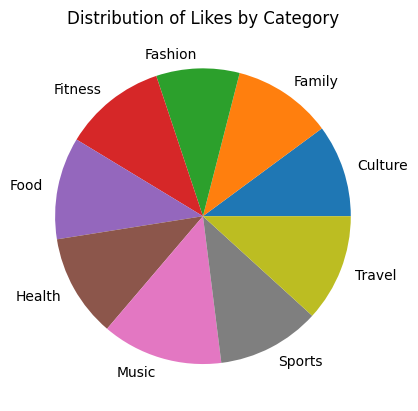

In [17]:
likes_by_category = df.groupby('Category')['Likes'].sum()
plt.pie(likes_by_category, labels=likes_by_category.index)
plt.title("Distribution of Likes by Category")
plt.show()

In [18]:
mean_of_likes = df['Likes'].mean()
print("Mean of the 'Likes' category: {}".format(mean_of_likes))

Mean of the 'Likes' category: 4961.923


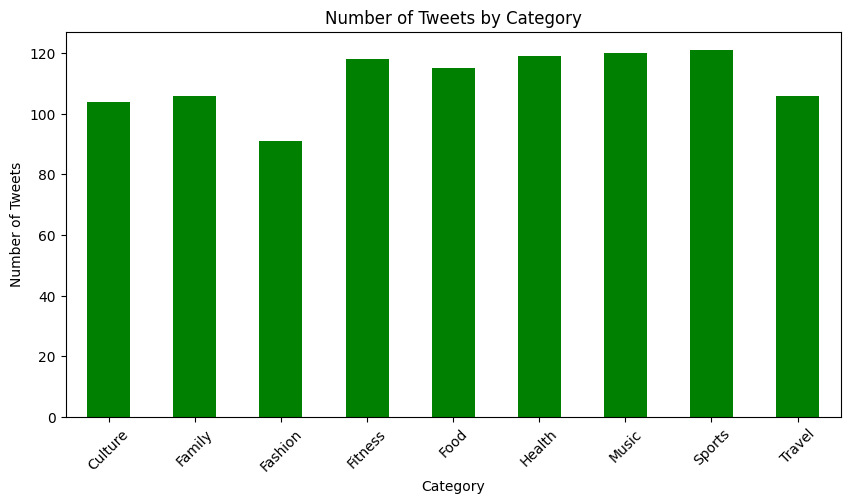

In [19]:
number_of_tweets_by_category = df.groupby('Category')['Category'].count()
number_of_tweets_by_category.plot(kind="bar", figsize=(10,5), color='green')
plt.title("Number of Tweets by Category")
plt.ylabel("Number of Tweets")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.show()

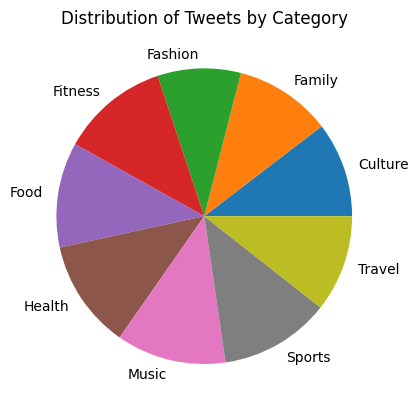

In [20]:
number_of_tweets_by_category = df.groupby('Category')['Category'].count()
plt.pie(number_of_tweets_by_category, labels=number_of_tweets_by_category.index)
plt.title("Distribution of Tweets by Category")
plt.show()

In [22]:
# Most popular category
query = """
SELECT
    Category,
    COUNT(*) AS Frequency
FROM
    df
GROUP BY 
    Category
ORDER BY
    Frequency DESC
"""

result = sqldf(query)
print(result)

  Category  Frequency
0   Sports        121
1    Music        120
2   Health        119
3  Fitness        118
4     Food        115
5   Travel        106
6   Family        106
7  Culture        104
8  Fashion         91


- The result shows that `Sports` is in first place.